In [1]:
import networkx as nx
import pandas as pd

import utils

# Apply methods from project thesis

In [2]:
import pickle
with open('graph_objects/scigrid.pkl', 'rb') as f:
    G = pickle.load(f)

G_project_thesis = nx.read_graphml('graph_objects/entsog')

In [3]:
n_benchmarks = 50

## Project thesis

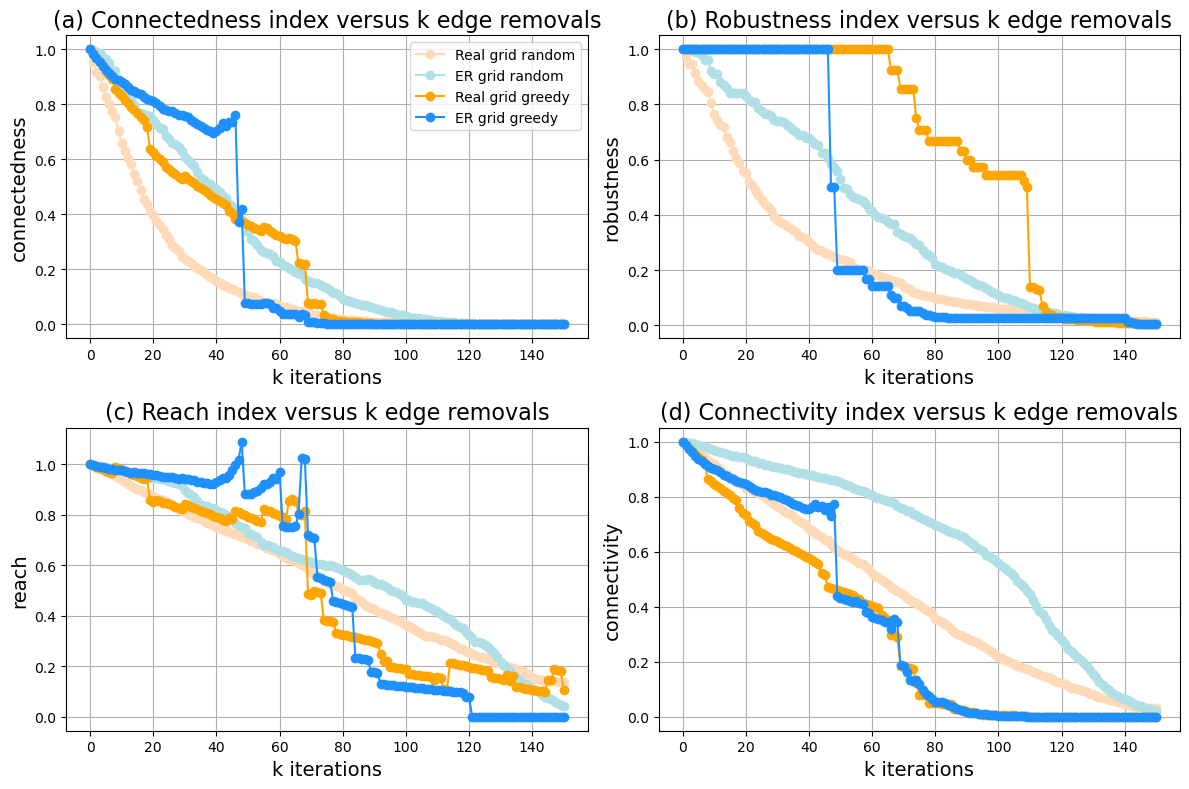

In [11]:
# random_edge_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=150, heuristic='random', remove='edge')
# greedy_edge_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=150, heuristic='greedy', remove='edge')

# random_edge_removal_project_thesis_df.to_pickle('results/project_thesis_random_edge_removal_project_thesis.pkl')
# greedy_edge_removal_project_thesis_df.to_pickle('results/project_thesis_greedy_edge_removal_project_thesis.pkl')

random_edge_removal_project_thesis_df = pd.read_pickle('results/project_thesis_random_edge_removal_project_thesis.pkl')
greedy_edge_removal_project_thesis_df = pd.read_pickle('results/project_thesis_greedy_edge_removal_project_thesis.pkl')

titles = ['(a) Connectedness index versus k edge removals', '(b) Robustness index versus k edge removals', '(c) Reach index versus k edge removals', '(d) Connectivity index versus k edge removals']

utils.plot_connectedness_fourway([random_edge_removal_project_thesis_df, greedy_edge_removal_project_thesis_df], titles)

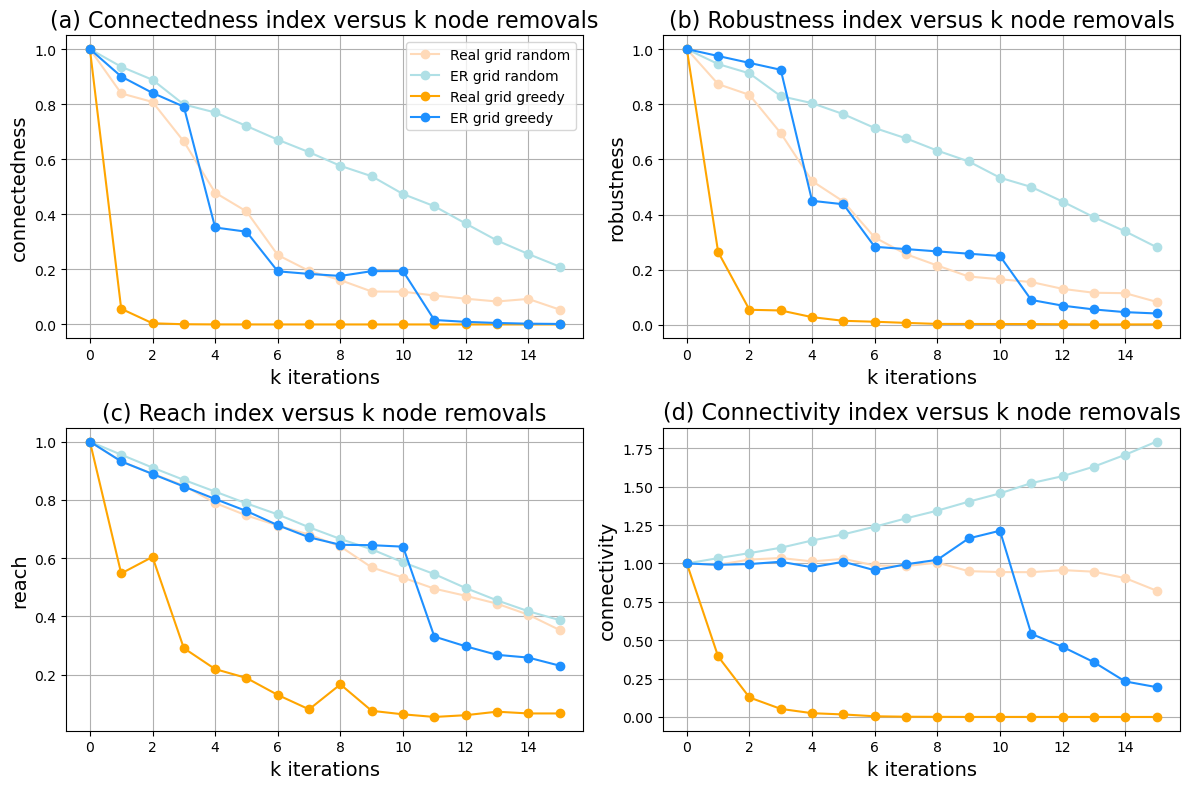

In [10]:

# random_node_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=15, heuristic='random', remove='node')
# greedy_node_removal_project_thesis_df, _ = utils.n_minus_k(G_project_thesis.copy(), n_benchmarks=n_benchmarks, k_removals=15, heuristic='greedy', remove='node')

# random_node_removal_project_thesis_df.to_pickle('results/project_thesis_random_node_removal_project_thesis.pkl')
# greedy_node_removal_project_thesis_df.to_pickle('results/project_thesis_greedy_node_removal_project_thesis.pkl')

random_node_removal_project_thesis_df = pd.read_pickle('results/project_thesis_random_node_removal_project_thesis.pkl')
greedy_node_removal_project_thesis_df = pd.read_pickle('results/project_thesis_greedy_node_removal_project_thesis.pkl')

titles = ['(a) Connectedness index versus k node removals', '(b) Robustness index versus k node removals', '(c) Reach index versus k node removals', '(d) Connectivity index versus k node removals']

utils.plot_connectedness_fourway([random_node_removal_project_thesis_df, greedy_node_removal_project_thesis_df], titles)

## Scigrid

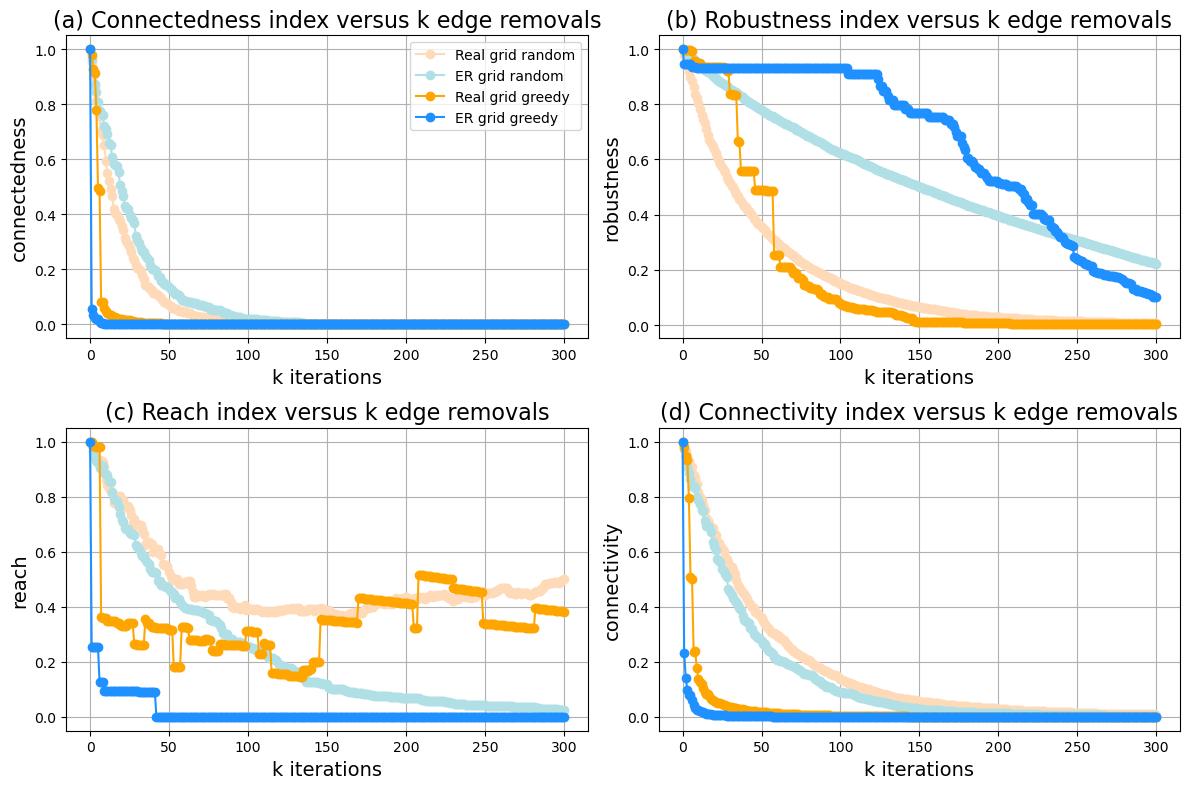

In [14]:
# random_edge_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='random', remove='edge')
# greedy_edge_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='greedy', remove='edge')

# random_edge_removal_scigrid_df.to_pickle('results/project_thesis_random_edge_removal_scigrid.pkl')
# greedy_edge_removal_scigrid_df.to_pickle('results/project_thesis_greedy_edge_removal_scigrid.pkl')

random_edge_removal_scigrid_df = pd.read_pickle('results/project_thesis_random_edge_removal_scigrid.pkl')
greedy_edge_removal_scigrid_df = pd.read_pickle('results/project_thesis_greedy_edge_removal_scigrid.pkl')

titles = ['(a) Connectedness index versus k edge removals', '(b) Robustness index versus k edge removals', '(c) Reach index versus k edge removals', '(d) Connectivity index versus k edge removals']

utils.plot_connectedness_fourway([random_edge_removal_scigrid_df, greedy_edge_removal_scigrid_df], titles)

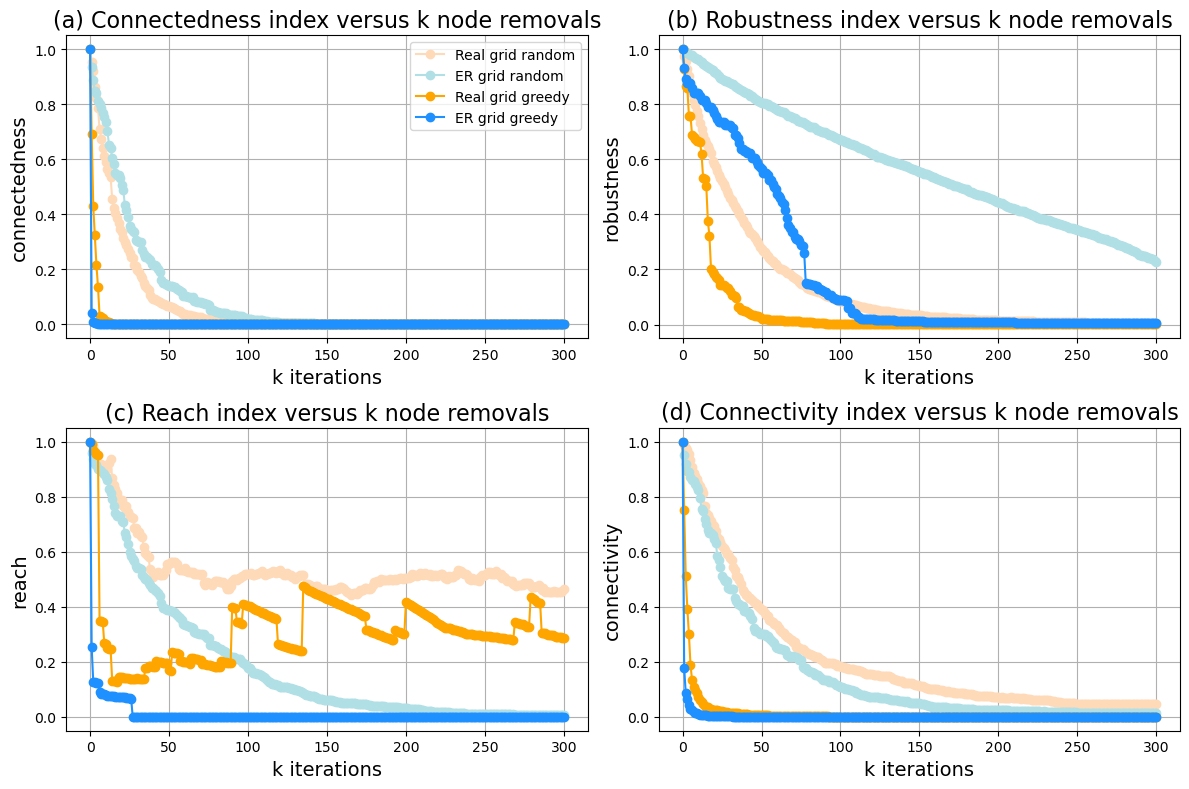

In [13]:

# random_node_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='random', remove='node')
# greedy_node_removal_scigrid_df, _ = utils.n_minus_k(G.copy(), n_benchmarks=n_benchmarks, k_removals=300, heuristic='greedy', remove='node')

# random_node_removal_scigrid_df.to_pickle('results/project_thesis_random_node_removal_scigrid.pkl')
# greedy_node_removal_scigrid_df.to_pickle('results/project_thesis_greedy_node_removal_scigrid.pkl')

random_node_removal_scigrid_df = pd.read_pickle('results/project_thesis_random_node_removal_scigrid.pkl')
greedy_node_removal_scigrid_df = pd.read_pickle('results/project_thesis_greedy_node_removal_scigrid.pkl')

titles = ['(a) Connectedness index versus k node removals', '(b) Robustness index versus k node removals', '(c) Reach index versus k node removals', '(d) Connectivity index versus k node removals']

utils.plot_connectedness_fourway([random_node_removal_scigrid_df, greedy_node_removal_scigrid_df], titles)